The main code is from gpreda, [Main-source](https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models/notebook)

In [1]:
import pandas as pd
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

## Let's deep dive the data!

### Recognize the data

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Total data original
df.shape

(284807, 31)

### Target Distribution

In [5]:

print('Target distribution "1" и "0" in column "Class", legal and fraudulent transactions, respectively, pieces')
target_count = df['Class'].value_counts()
print('0:', target_count[0])
print('1:', target_count[1])
print('Imbalance degree:', '1:', round(target_count[0] / target_count[1], 2))
print (' ')
print('Target distribution "1" и "0" in column "Class", legal and fraudulent transactions, respectively, %')
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)

Target distribution "1" и "0" in column "Class", legal and fraudulent transactions, respectively, pieces
0: 284315
1: 492
Imbalance degree: 1: 577.88
 
Target distribution "1" и "0" in column "Class", legal and fraudulent transactions, respectively, %
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


The information provided is about the distribution of a target variable, labeled as "Class", in a dataset. This variable seems to represent whether a transaction is legal (0) or fraudulent (1). 

Here's what the numbers mean:

- There are **284,315 legal transactions** (represented by 0) and **492 fraudulent transactions** (represented by 1) in the dataset.
- The **imbalance degree** of 1:577.88 indicates that for every fraudulent transaction, there are about 578 legal transactions. This is a significant imbalance, which could potentially affect the performance of a machine learning model trained on this data.
- The percentages show that **99.827251% of the transactions are legal** and only **0.172749% are fraudulent**.

This kind of imbalance is common in datasets for fraud detection, as fraudulent transactions are typically much rarer than legal ones. However, it's important to handle this imbalance appropriately during model training to ensure that the model can still detect the minority class (fraudulent transactions) effectively. Techniques such as oversampling the minority class, undersampling the majority class, or using a combination of both can be used to address this issue. It's also crucial to use appropriate evaluation metrics (like precision, recall, F1-score, or AUC-ROC) that can handle imbalanced datasets. 😊

### Data Duplicate

In [6]:
duplicated_values = df[df.duplicated()]

In [7]:
df.shape

(284807, 31)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [9]:
print(f'There are {284807 - 283726} duplicate samples')

There are 1081 duplicate samples


In [10]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

### Missing Values and data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

There are no missing values

### Correlation

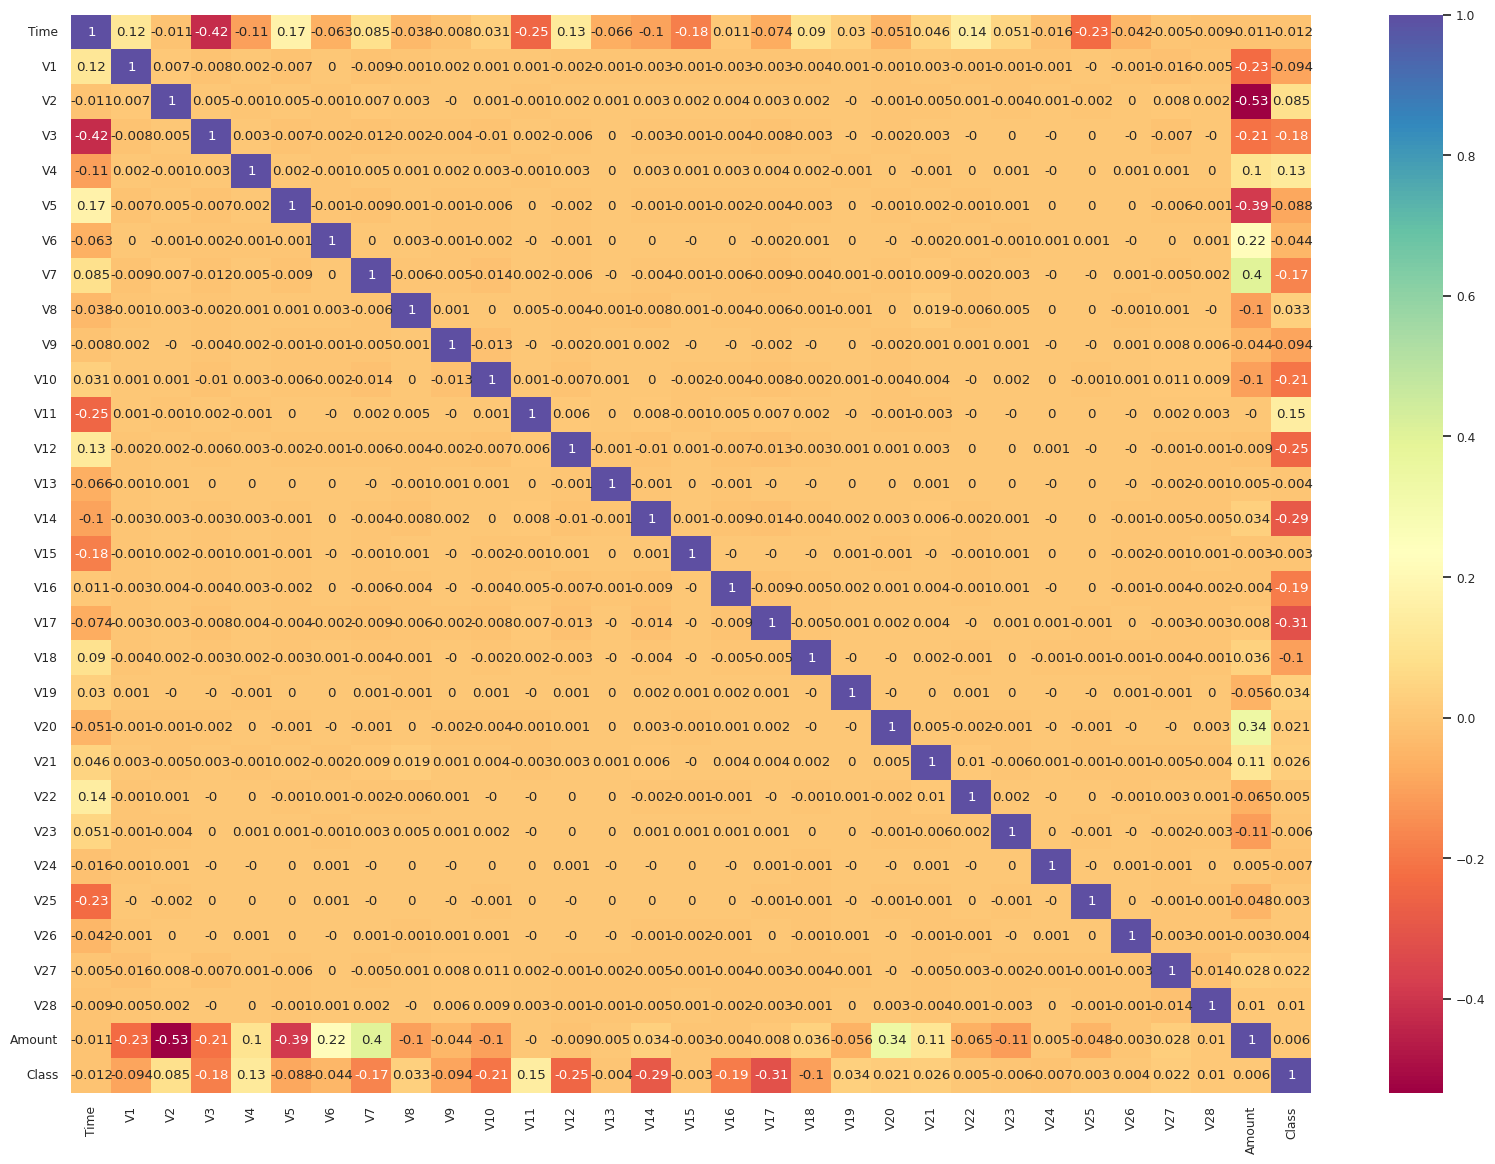

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

corr= round(df.corr(),3)
plt.figure(figsize=(20,14))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap = 'Spectral', annot = True)
plt.show()

The correlation coefficient measures the statistical relationship between two variables. The lowest correlation coefficient is -0.53 between the variables "V1" and "Amount" indicates a moderate negative relationship.

A negative correlation means that as one variable increases, the other decreases, and vice versa. So, a correlation of -0.53 suggests that higher values of "V1" are associated with lower values of "Amount", and lower values of "V1" are associated with higher values of "Amount".

However, it's important to note that correlation does not imply causation. While these variables move together, it doesn't necessarily mean that changes in one variable are causing changes in the other. There could be other factors at play, or it could be a coincidence. 😊

### Variables Time and Amount

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


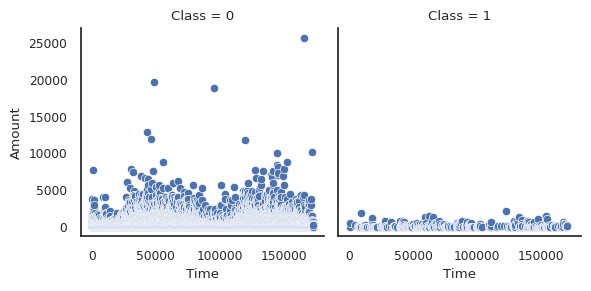

In [13]:
sns.set_style(style='white')
facet_grid = sns.FacetGrid(data=df, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

A scatter plot with 'Time' on the x-axis and 'Amount' on the y-axis. This plot is separated by 'Class', which indicates whether a transaction is fraudulent or not. This visualization helps understand if there's a pattern or relationship between 'Time', 'Amount', and the transaction being fraudulent.

Building a model without the 'Amount' and 'Time' variables. By excluding these variables, I wants the model to depend on other features that might be more indicative.

In [14]:
# Let's drop columns 'Time' and 'Amount'
df_copy = df.copy()
df_copy.drop('Time', axis = 1, inplace=True)
df_copy.drop('Amount', axis = 1, inplace=True)

In [15]:
df_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Split data the data into target (у) and (Х) variables

In [16]:
y = df_copy['Class']
X = df_copy.drop(['Class'], axis=1)

In [17]:
df_copy.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


In [40]:
X_train, X_test, Y_train,Y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (255353, 28)
Y_train: (255353,)
X_test: (28373, 28)
Y_test: (28373,)


The mean values are close to 0 and the standard deviation values are close to 1 for most of the variables (V1 to V28). This suggests that the data might have been standardized. Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here's the formula for standardization: 

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $z$ is the new value,
- $x$ is the original feature vector,
- $\mu$ is the mean of the feature vector, and
- $\sigma$ is its standard deviation.

It means I can use this data directly to train my machine learning model, as it's already been scaled appropriately. This is beneficial as many machine learning algorithms perform better when the input numerical variables fall within a similar scale. In this case, it seems like my data is ready to be used! 😊

## Training the model

Based on this [source](https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models/notebook).

I choose model Extra Trees Classifier + ADASYN, the reason:
- It has a high ROC-AUC score, which indicates a good balance of sensitivity and specificity, meaning the model is good at distinguishing between the classes.
- The number of false positives is relatively low compared to the other models with similar ROC-AUC scores.
- The number of false negatives, which are particularly important in fraud detection, is the same for all models.

In [56]:
from imblearn.over_sampling import ADASYN
print('Original dataset shape %s' % Counter(Y_train))
ada = ADASYN(sampling_strategy='auto', random_state=42)
x_ada, y_ada = ada.fit_resample(X_train, Y_train)
print('Resampled dataset shabe %s' % Counter(y_ada))

Original dataset shape Counter({0: 254927, 1: 426})
Resampled dataset shabe Counter({0: 254927, 1: 254900})


In [57]:
target_count_y_ada = y_ada.value_counts()
target_count_0_y_ada = target_count_y_ada[0]
target_count_1_y_ada = target_count_y_ada[1]
print('Imbalance degree:', '1:', round(target_count_0_y_ada  / target_count_1_y_ada, 2))

Imbalance degree: 1: 1.0


In [58]:
y_ada_s = y_ada.squeeze()

Text(0.5, 1.0, 'Original dataset')

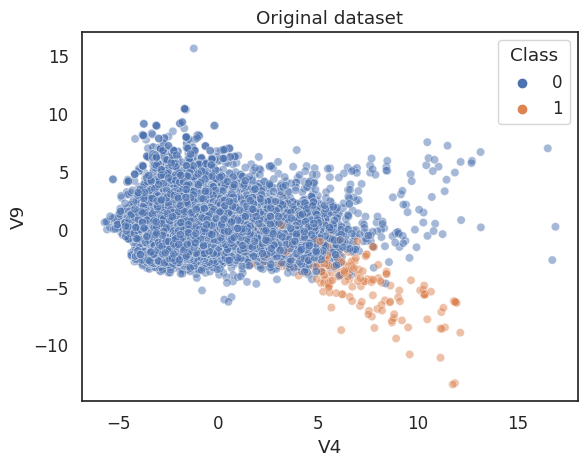

In [44]:
sns.set_style(style='white')
sns.scatterplot(data=X_train, x='V4', y='V9', hue=Y_train, alpha=0.5)
plt.title('Original dataset')

Text(0.5, 1.0, 'Oversampled by Adasyn')

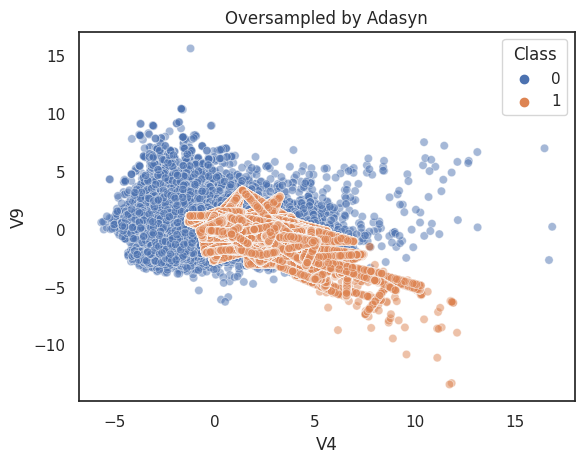

In [59]:
sns.set_style(style='white')
sns.scatterplot(data=x_ada, x='V4', y='V9', hue=y_ada_s, alpha=0.5)
plt.title('Oversampled by Adasyn')

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

etc_ada = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
etc_ada.fit(x_ada, y_ada)

ExtraTreesClassifier(random_state=0)

In [61]:
Y_pred_etc_ada = etc_ada.predict(X_test)
cm_etc_ada = confusion_matrix(Y_test, Y_pred_etc_ada)

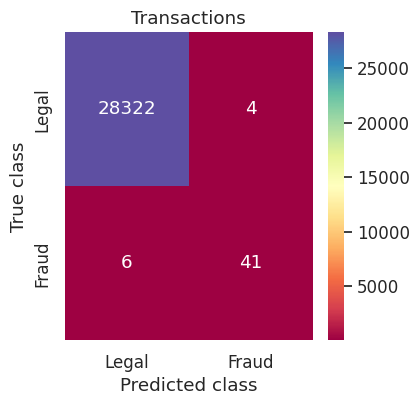

In [62]:
LABELS = ['Legal', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_etc_ada, xticklabels=LABELS, yticklabels=LABELS, cmap = 'Spectral', annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [63]:
Y_pred_proba_train_etc_ada = etc_ada.predict_proba(x_ada)
roc_auc_score_Train_etc_ada = roc_auc_score(y_ada, Y_pred_proba_train_etc_ada[:,1])
print('Train set roc-auc:', roc_auc_score_Train_etc_ada)

Y_pred_proba_test_etc_ada = etc_ada.predict_proba(X_test)
roc_auc_score_Test_etc_ada = roc_auc_score(Y_test, Y_pred_proba_test_etc_ada[:,1])
print('Test set roc_auc:', roc_auc_score_Test_etc_ada)

Train set roc-auc: 1.0
Test set roc_auc: 0.9866095505069398


In [64]:
cr_etc_ada = classification_report(Y_test, Y_pred_etc_ada)
print('ETC + ADASYN')
print(cr_etc_ada)

ETC + ADASYN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28326
           1       0.91      0.87      0.89        47

    accuracy                           1.00     28373
   macro avg       0.96      0.94      0.95     28373
weighted avg       1.00      1.00      1.00     28373

